<a href="https://colab.research.google.com/github/Dumisani23/black-panther-machine/blob/main/Ethanol_Concentration_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import tree

In [66]:
df = pd.read_csv("Research1.csv")
df.head()

,EtOH,SG,Turbidity
0,28.31136,1.084034,240
1,28.31136,1.084034,240
2,28.31136,1.084034,274
3,98.80815,1.076337,79
4,98.80815,1.076337,79


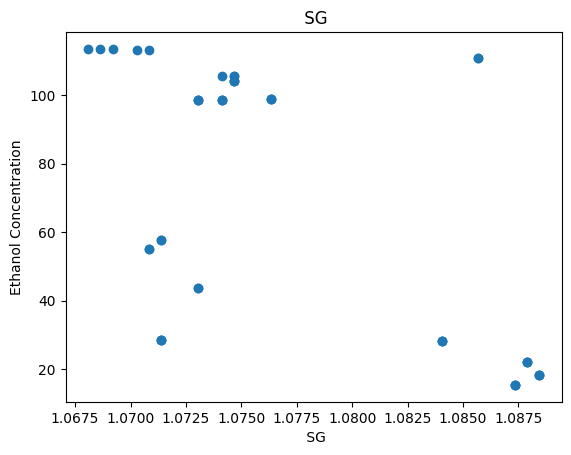

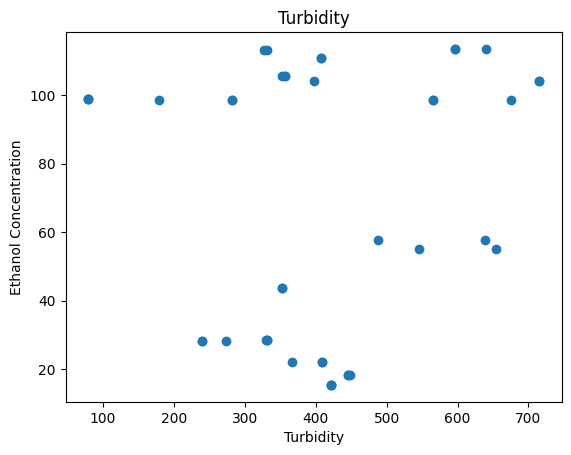

In [67]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["EtOH"])
  plt.title(label)
  plt.ylabel("Ethanol Concentration")
  plt.xlabel(label)
  plt.show()

#Training, Validating and Testing


In [68]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [69]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.colums if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y

In [70]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, "EtOH", x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, "EtOH", x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "EtOH", x_labels=df.columns[1:])



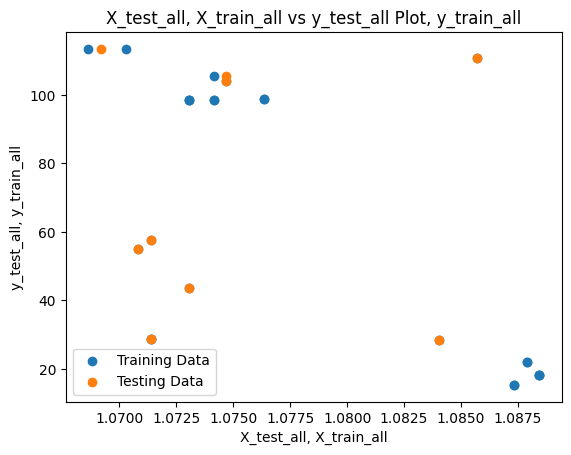

In [114]:
# Plot X_test_all vs y_test_all
plt.scatter(X_train_all[:,0], y_train_all, label='Training Data')
plt.scatter(X_test_all[:,0], y_test_all, label='Testing Data')

# Set the axis labels
plt.xlabel('X_test_all, X_train_all')
plt.ylabel('y_test_all, y_train_all')

#plt.plot(X_train_all[:,0], y_train_all, label='Training Data')
#plt.plot(X_test_all[:,0], y_test_all, label='Test Data')

# Set the title
plt.title('X_test_all, X_train_all vs y_test_all Plot, y_train_all')

# Show the plot
plt.legend()
plt.show()


#Implementation of the Models

#Linear regression

In [72]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [73]:
all_reg.score(X_test_all, y_test_all)

-0.42325926718346407

#Decision Tree

In [74]:
all_dt=DecisionTreeRegressor(random_state=42)
all_dt.fit(X_train_all, y_train_all)

DecisionTreeRegressor(random_state=42)

In [75]:
all_dt.score(X_test_all, y_test_all)

0.9970112381271429

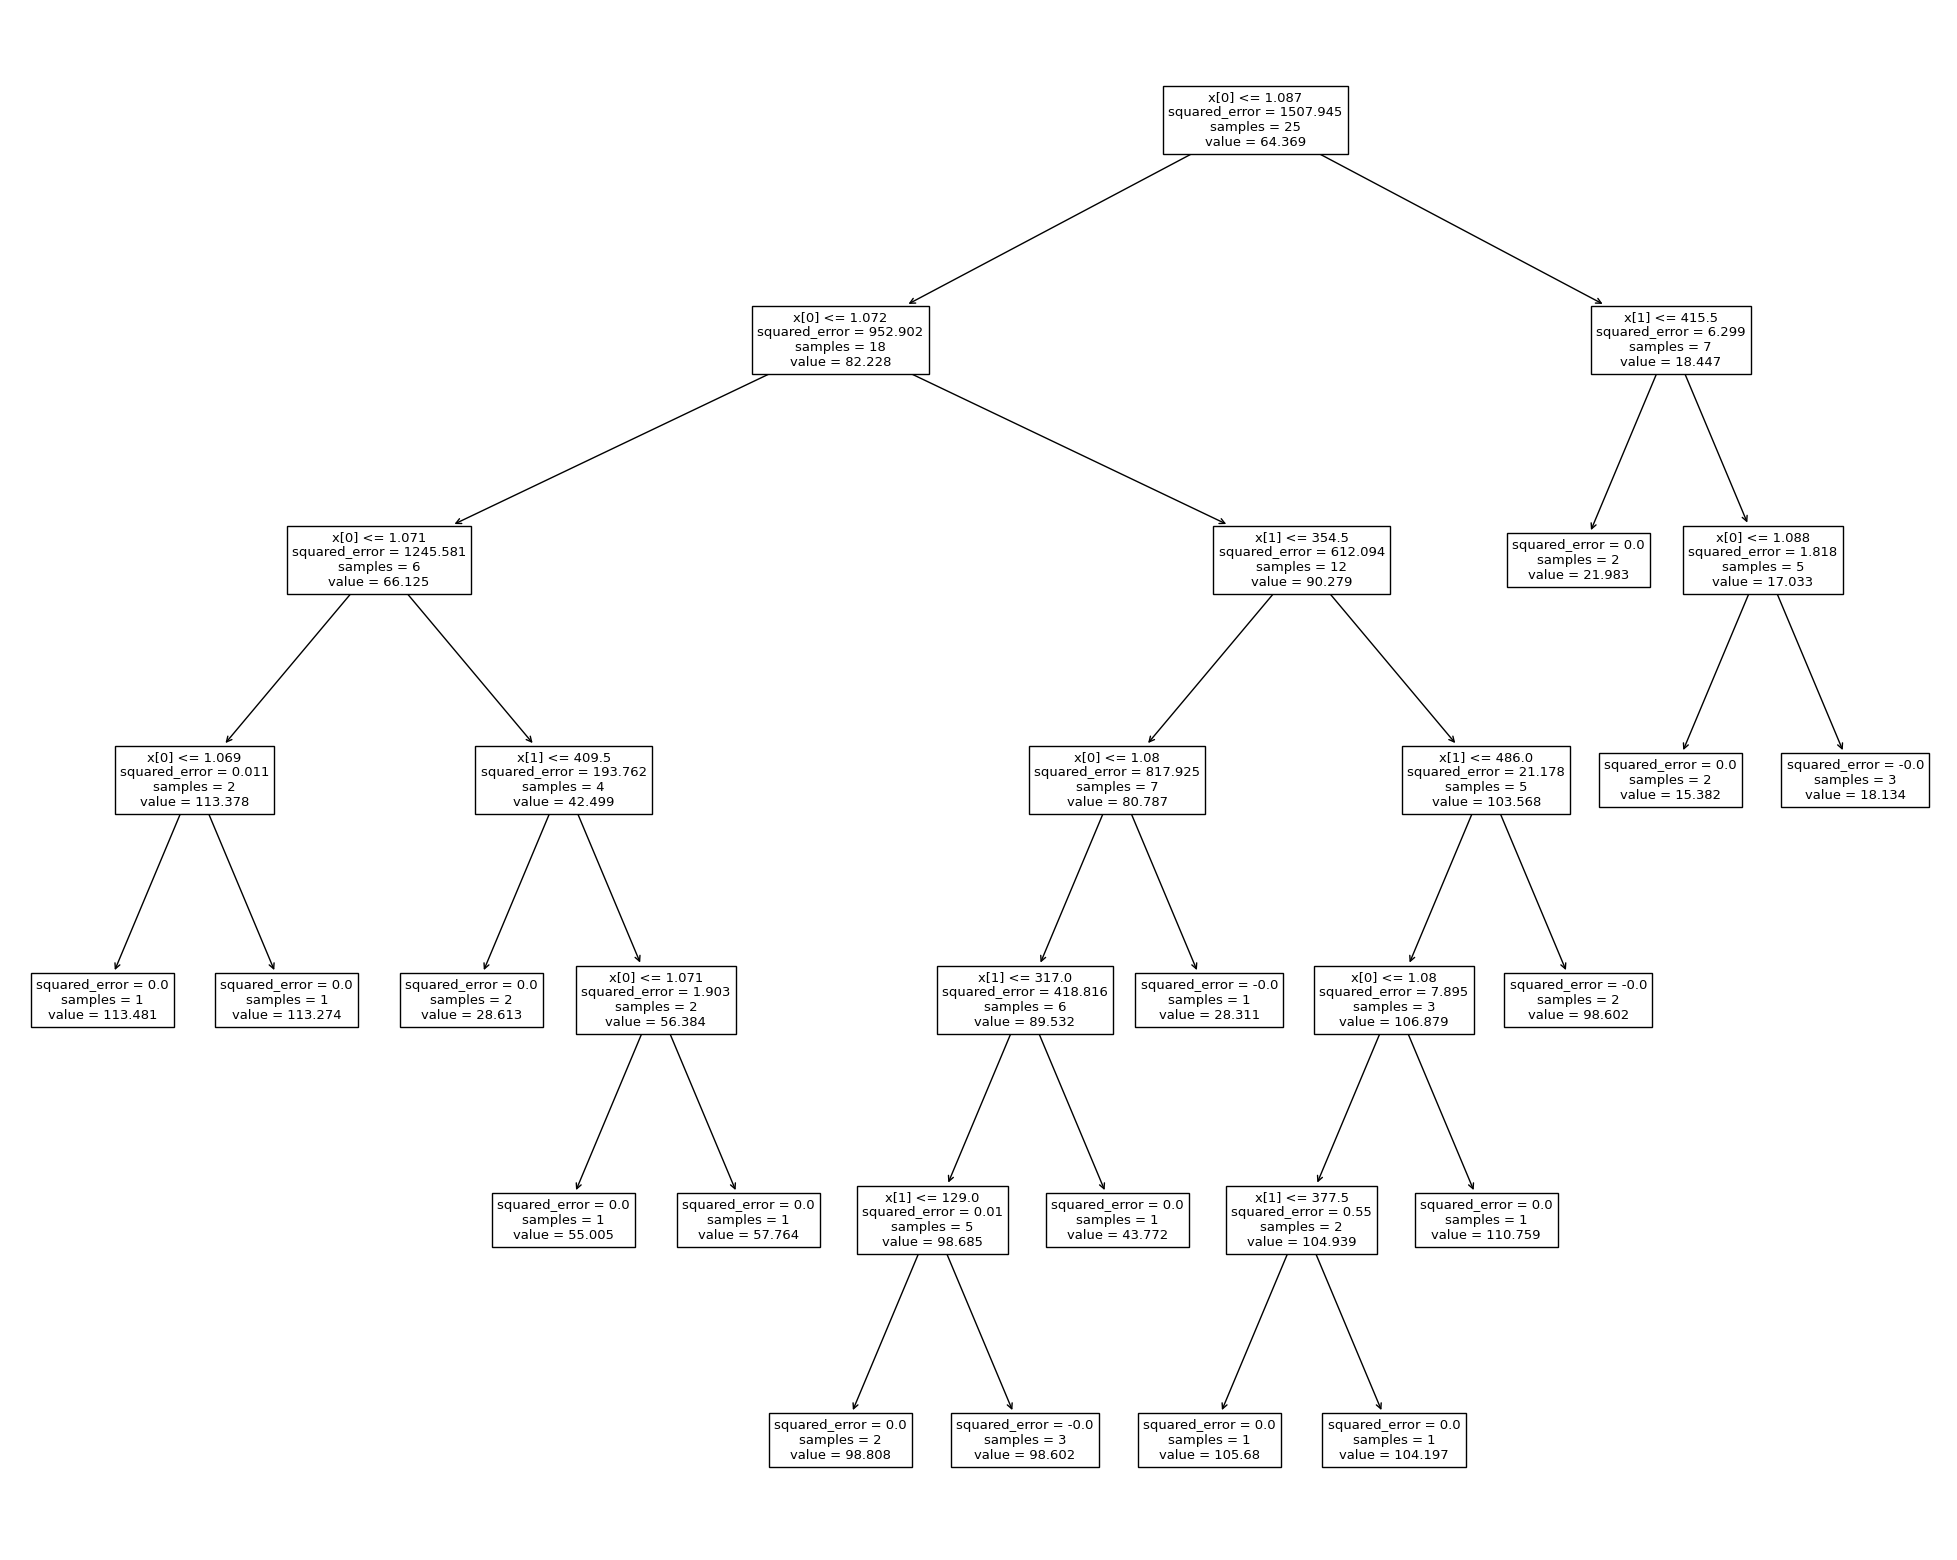

In [110]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(all_dt)
plt.show()


#Support Vector Regression


In [77]:
all_svr = SVR()
all_svr.fit(X_train_all, y_train_all)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [78]:
all_svr.score(X_test_all, y_test_all)

-0.15601469533990664

#Lasso and Ridge Regression

In [79]:
all_la = Lasso()
all_la.fit(X_train_all, y_train_all)


Lasso()

In [80]:
all_la.score(X_test_all, y_test_all)


-0.2306709711321644

In [81]:
all_ri = Ridge()
all_ri.fit(X_train_all, y_train_all)

Ridge()

In [82]:
all_ri.score(X_test_all, y_test_all)

-0.230730187515648

#Random Forest

In [83]:
#from sklearn.utils import random

#random_states = range(1, 1001)

#best_accuracy = 0
#best_random_state = None


#for _ in range(len(random_states)):
  #random_state = np.random.randint(0, len(random_states) - 1)

  #all_rf = RandomForestRegressor(n_estimators=14, random_state=random_states[random_state])
  #all_rf.fit(X_train_all, y_train_all.ravel())
  #accuracy = all_rf.score(X_test_all, y_test_all)

 # if accuracy > best_accuracy:
    #best_accuracy = accuracy
    #best_random_state = random_states[random_state]

#print(f"Best Random State: {best_random_state}")
#print(f"Best Accuracy: {best_accuracy}")
#random_state=361 (result=0.9217997184333229)
all_rf = RandomForestRegressor(n_estimators=14, random_state=361)
all_rf.fit(X_train_all, y_train_all)


<ipython-input-83-65c47e442df7>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  all_rf.fit(X_train_all, y_train_all)


RandomForestRegressor(n_estimators=14, random_state=361)

In [84]:
all_rf.score(X_test_all, y_test_all)

0.7164202427699797

#Gradient Boosting

In [85]:
all_gb = GradientBoostingRegressor(n_estimators=14, learning_rate=0.9, random_state=80)
all_gb.fit(X_train_all, y_train_all)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.9, n_estimators=14, random_state=80)

In [86]:
all_gb.score(X_test_all, y_test_all)

0.9875437876923461

#Adaptive Boosting

In [87]:
all_ab = AdaBoostRegressor(n_estimators=14, random_state=80)
all_ab.fit(X_train_all, y_train_all)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(n_estimators=14, random_state=80)

In [88]:
all_ab.score(X_test_all, y_test_all)

0.8116116631253517

#Extremely Randomized Trees

In [89]:
all_ert = ExtraTreesRegressor()
all_ert.fit(X_train_all, y_train_all)

<ipython-input-89-0f841c666a72>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  all_ert.fit(X_train_all, y_train_all)


ExtraTreesRegressor()

In [90]:
all_ert.score(X_test_all, y_test_all)

0.9322241872507977

#XG Boost


In [91]:
#from sklearn.utils import random

#random_states = range(1, 10001)

#best_accuracy = 0
#best_random_state = None


#for _ in range(len(random_states)):
  #random_state = np.random.randint(0, len(random_states) - 1)

  #all_xgb = XGBRegressor(objective='reg:squarederror', random_state=random_states[random_state])
  #all_xgb.fit(X_train_all, y_train_all.ravel())
  #accuracy = all_xgb.score(X_test_all, y_test_all)

  #if accuracy > best_accuracy:
    #best_accuracy = accuracy
    #best_random_state = random_states[random_state]

##print(f"Best Random State: {best_random_state}")
#print(f"Best Accuracy: {best_accuracy}")
#best random state=2915, best accuracy = 0.4346359188613298
all_xgb = XGBRegressor(objective='reg:squarederror', random_state=1)
all_xgb.fit(X_train_all, y_train_all)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [92]:
all_xgb.score(X_test_all, y_test_all)

0.9965273105044203

In [93]:
# Get the feature importances of the model
feature_importances = all_dt.feature_importances_

# Print the weights of the features
print(feature_importances)

[0.86959206 0.13040794]


#Neural Network


In [94]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [95]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(2,), axis=-1)
all_normalizer.adapt(X_train_all)

In [96]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [97]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    verbose=0, epochs=100
)

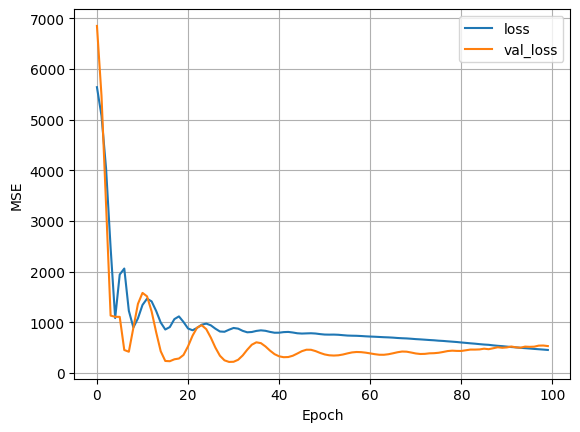

In [98]:
plot_loss(history)

#Metrics for the Models


In [99]:
y_pred_lr = all_reg.predict(X_test_all)
y_pred_dt = all_dt.predict(X_test_all)
y_pred_svr = all_svr.predict(X_test_all)
y_pred_la = all_la.predict(X_test_all)
y_pred_ri = all_ri.predict(X_test_all)
y_pred_rf = all_rf.predict(X_test_all)
y_pred_gb = all_gb.predict(X_test_all)
y_pred_ab = all_ab.predict(X_test_all)
y_pred_ert = all_ert.predict(X_test_all)
y_pred_xgb = all_xgb.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

1/1 [==============================] - 0s 69ms/step


#R^2 Score

In [100]:
r2_lr = all_reg.score(X_test_all, y_test_all)
r2_dt = all_dt.score(X_test_all, y_test_all)
r2_svr = all_svr.score(X_test_all, y_test_all)
r2_la = all_la.score(X_test_all, y_test_all)
r2_ri = all_ri.score(X_test_all, y_test_all)
r2_rf = all_rf.score(X_test_all, y_test_all)
r2_gb = all_gb.score(X_test_all, y_test_all)
r2_ab = all_ab.score(X_test_all, y_test_all)
r2_ert = all_ert.score(X_test_all, y_test_all)
r2_xgb = all_xgb.score(X_test_all, y_test_all)
#r2_nn = nn_model.score(X_test_all, y_test_all)

print("R2 of Linear Regression: ",r2_lr)
print("R2 of Decision Trees: ",r2_dt)
print("R2 of Support Vector Regression: ", r2_svr)
print("R2 of Lasso Regression: ", r2_la)
print("R2 of Ridge Regression: ", r2_ri)
print("R2 of Random Forest: ", r2_rf)
print("R2 of Gradient Boosting: ", r2_gb)
print("R2 of Adaptive Boosting: ", r2_ab)
print("R2 of Extreme Randomized Trees: ", r2_ert)
print("R2 of XG Boost: ", r2_xgb)
#print("R2 of XG Neural Network: ", r2_nn)


R2 of Linear Regression:  -0.42325926718346407
R2 of Decision Trees:  0.9970112381271429
R2 of Support Vector Regression:  -0.15601469533990664
R2 of Lasso Regression:  -0.2306709711321644
R2 of Ridge Regression:  -0.230730187515648
R2 of Random Forest:  0.7164202427699797
R2 of Gradient Boosting:  0.9875437876923461
R2 of Adaptive Boosting:  0.8116116631253517
R2 of Extreme Randomized Trees:  0.9322241872507977
R2 of XG Boost:  0.9965273105044203


#Mean Squared Error of the Models

In [101]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

MSE_lr = MSE(y_pred_lr, y_test_all)
MSE_dt = MSE(y_pred_dt, y_test_all)
MSE_svr = MSE(y_pred_svr, y_test_all)
MSE_la = MSE(y_pred_la, y_test_all)
MSE_ri = MSE(y_pred_ri, y_test_all)
MSE_rf = MSE(y_pred_rf, y_test_all)
MSE_gb = MSE(y_pred_gb, y_test_all)
MSE_ab = MSE(y_pred_ab, y_test_all)
MSE_ert = MSE(y_pred_ert, y_test_all)
MSE_xgb = MSE(y_pred_xgb, y_test_all)
MSE_nn = MSE(y_pred_nn, y_test_all)

print("MSE of Linear Regression: ", MSE_lr)
print("MSE of Decision Trees: ", MSE_dt)
print("MSE of Support Vector Regressor: ", MSE_lr)
print("MSE of Lasso Regression: ", MSE_la)
print("MSE of Ridge Regression: ", MSE_ri)
print("MSE of Random Forest: ", MSE_rf)
print("MSE of Gradient Boosting: ", MSE_gb)
print("MSE of Adaptive Boosting: ", MSE_ab)
print("MSE of Extra Trees Regression: ", MSE_ert)
print("MSE of XG Boost: ", MSE_xgb)
print("MSE of Neural Network: ", MSE_nn)

MSE of Linear Regression:  1656.2664179063468
MSE of Decision Trees:  2290.81738946628
MSE of Support Vector Regressor:  1656.2664179063468
MSE of Lasso Regression:  1295.1740561464173
MSE of Ridge Regression:  1432.2176753639844
MSE of Random Forest:  1825.2721641385197
MSE of Gradient Boosting:  2350.290393121877
MSE of Adaptive Boosting:  1843.7305519060596
MSE of Extra Trees Regression:  2204.4670571765905
MSE of XG Boost:  2263.7269919747155
MSE of Neural Network:  1005.5822799762375


#Root Mean Squared Error of the Models

In [102]:
def RMSE(y_pred, y_real):
  return (np.sqrt(np.square(y_pred - y_real)).mean())

RMSE_lr = RMSE(y_pred_lr, y_test_all)
RMSE_dt = RMSE(y_pred_dt, y_test_all)
RMSE_svr = RMSE(y_pred_svr, y_test_all)
RMSE_la = RMSE(y_pred_la, y_test_all)
RMSE_ri = RMSE(y_pred_ri, y_test_all)
RMSE_rf = RMSE(y_pred_rf, y_test_all)
RMSE_gb = RMSE(y_pred_gb, y_test_all)
RMSE_ab = RMSE(y_pred_ab, y_test_all)
RMSE_ert = RMSE(y_pred_ert, y_test_all)
RMSE_xgb = RMSE(y_pred_xgb, y_test_all)
RMSE_nn = RMSE(y_pred_nn, y_test_all)

print("RMSE of Linear Regression: ", RMSE_lr)
print("RMSE of Decision Trees: ", RMSE_dt)
print("RMSE of Support Vector Machine: ", RMSE_svr)
print("RMSE of Lasso Regression: ", RMSE_la)
print("RMSE of Ridge Regression: ", RMSE_ri)
print("RMSE of Random Forest: ", RMSE_rf)
print("RMSE of Gradient Boosting: ", RMSE_gb)
print("RMSE of Adaptive Boosting: ", RMSE_ab)
print("RMSE of Extra Random Trees: ", RMSE_ert)
print("RMSE of XG Boost: ", RMSE_xgb)
print("RMSE of Neural Network: ", RMSE_nn)

RMSE of Linear Regression:  36.84224898690416
RMSE of Decision Trees:  37.46809395061729
RMSE of Support Vector Machine:  31.07156873830202
RMSE of Lasso Regression:  31.512548319702873
RMSE of Ridge Regression:  32.69487335077474
RMSE of Random Forest:  35.6440732627866
RMSE of Gradient Boosting:  37.920586631322
RMSE of Adaptive Boosting:  34.68137908754209
RMSE of Extra Random Trees:  37.51568149876544
RMSE of XG Boost:  37.31558913185402
RMSE of Neural Network:  27.594197915378146


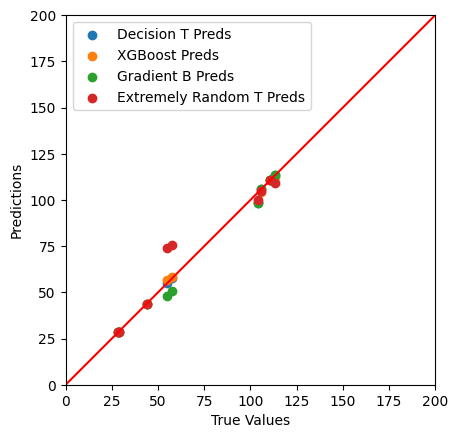

In [115]:
ax = plt.axes(aspect="equal")
#plt.scatter(y_test_all, y_pred_lr, label="Lin Reg Preds")
plt.scatter(y_test_all, y_pred_dt, label="Decision T Preds")
#plt.scatter(y_test_all, y_pred_rf, label="Random F Preds")
plt.scatter(y_test_all, y_pred_xgb, label="XGBoost Preds")
plt.scatter(y_test_all, y_pred_gb, label="Gradient B Preds")
plt.scatter(y_test_all, y_pred_ert, label="Extremely Random T Preds")
#plt.scatter(y_test_all, y_pred_nn, label="NN Preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 200]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_=plt.plot(lims, lims, c="red")

#Prediction of Ethanol Concentration

In [104]:
def predict(SG,Turbidity, model):
  x = np.array([SG, Turbidity]).reshape(-1, 2)
  y_pred = model.predict(x)
  return y_pred[0]

In [105]:
SG = float(input("Enter the specific gravity of fermentation liquid: "))
Turbidity = float(input("Enter the turbidity of fermentation liquid: "))
y_pred = predict(SG, Turbidity,all_dt)

print("The concentration of ethanol is " + str(y_pred))

Enter the specific gravity of fermentation liquid: 1.070289373
Enter the turbidity of fermentation liquid: 331
The concentration of ethanol is 113.27379
